### Student Information
Name: 賴彥霖

Student ID: NTHU - 112061591

GitHub ID: WalterOuO

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### First: take home exercise

#### Library import and Data load

In [22]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [5]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

In [6]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [8]:
# add columns to the dataframe
X['category'] = twenty_train.target
X['category_name'] = X['category'].map({a:b for a,b in enumerate(twenty_train.target_names)})

#### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [9]:
#Answer here
# Print the first 5 rows of the column 'category'
print(X.loc[:5, 'category'])
print(X.head())
print()

# Add a new column 'Cat' and set the first row of it ='cuttie' to the dataframe
X.at[0,'Cat'] = 'cuttie'                            # at是用來指定[第幾列, "label"行]的值，可以拿來賦值
print(X.head())
print("-"*100)

# iat is used to set the value of the 3rd row of the column 'Cat' to 'doggy'
X.iat[2, X.columns.get_loc('Cat')] = 'doggy'        # iat是用來指定[第幾列, 第幾行(行的index)]的值，可以拿來賦值
print(X.head())
print("-"*100)

# drop(remove) the column 'Cat' from the dataframe
X.drop(columns=['Cat'], inplace=True)               # drop是用來刪除資料的，可以指定要刪除的是什麼行/列，inplace=True是直接在原本的資料上刪除
print(X.head())

# get the first 5 rows for each 10 rows of the dataframe where the category == 3
X.loc[X['category'] == 3][::10][:5]

0    1
1    1
2    3
3    3
4    3
5    3
Name: category, dtype: int64
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
27,From: ruthless@panix.com (Ruth Ditucci) Subjec...,3,soc.religion.christian
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
124,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
163,From: tbrent@ecn.purdue.edu (Timothy J Brent) ...,3,soc.religion.christian


####  **>>>Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [11]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [12]:
NA_df['missing_example'].isnull().to_frame()

,missing_example
0,True
1,True
2,False
3,False
4,True
5,False


In [14]:
## Answer here
# C, D are the string 'NaN' and 'None' in missing_example column, so isnull() cannot detect it as missing value
# F is an empty string, so isnull() cannot detect it as missing value
# for A, B, E, np.nan, nothing, and None are all missing values, so isnull() can detect it as missing value

#### **>>> Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [20]:
# Answer here
X_sample = X.sample(n=1000) #random state
X_sample1 = X.sample(frac=0.05, random_state=1)
X_sample2 = X.sample(frac=0.05, random_state=2)
print(X_sample1[:3])
print('-'*100)
print(X_sample2[:3])

sample_observation = [{"shape":X.shape, "length":len(X), 
                       "por_category_0":round(len(X.loc[X['category'] == 0])/len(X),2),
                       "por_category_1":round(len(X.loc[X['category'] == 1])/len(X),2),
                       "por_category_2":round(len(X.loc[X['category'] == 2])/len(X),2),
                       "por_category_3":round(len(X.loc[X['category'] == 3])/len(X),2),
                       "por_cate_name_alt":round(len(X.loc[X['category_name'] == 'alt.atheism'])/len(X),2),
                       "por_cate_name_soc":round(len(X.loc[X['category_name'] == 'soc.religion.christian'])/len(X),2),
                       "por_cate_name_comp":round(len(X.loc[X['category_name'] == 'comp.graphics'])/len(X),2),
                       "por_cate_name_sci":round(len(X.loc[X['category_name'] == 'sci.med'])/len(X),2)},
                       {"shape":X_sample.shape, "length":len(X_sample),
                        "por_category_0":round(len(X_sample.loc[X_sample['category'] == 0])/len(X_sample),2),
                        "por_category_1":round(len(X_sample.loc[X_sample['category'] == 1])/len(X_sample),2),
                        "por_category_2":round(len(X_sample.loc[X_sample['category'] == 2])/len(X_sample),2),
                        "por_category_3":round(len(X_sample.loc[X_sample['category'] == 3])/len(X_sample),2),
                        "por_cate_name_alt":round(len(X_sample.loc[X_sample['category_name'] == 'alt.atheism'])/len(X_sample),2),
                        "por_cate_name_soc":round(len(X_sample.loc[X_sample['category_name'] == 'soc.religion.christian'])/len(X_sample),2),
                        "por_cate_name_comp":round(len(X_sample.loc[X_sample['category_name'] == 'comp.graphics'])/len(X_sample),2),
                        "por_cate_name_sci":round(len(X_sample.loc[X_sample['category_name'] == 'sci.med'])/len(X_sample),2)}
                      ]
observation_table= pd.DataFrame(sample_observation, index=['X', 'X_sample'])
observation_table

                                                   text  category  \
367   From: echen@burn.ee.washington.edu (Ed Chen) S...         1   
2108  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
2170  From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...         0   

      category_name  
367   comp.graphics  
2108    alt.atheism  
2170    alt.atheism  
----------------------------------------------------------------------------------------------------
                                                   text  category  \
1460  From: mpaul@unl.edu (marxhausen paul) Subject:...         3   
1632  From: khan0095@nova.gmi.edu (Mohammad Razi Kha...         1   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   

               category_name  
1460  soc.religion.christian  
1632           comp.graphics  
259              alt.atheism  


,shape,length,por_category_0,por_category_1,por_category_2,por_category_3,por_cate_name_alt,por_cate_name_soc,por_cate_name_comp,por_cate_name_sci
X,"(2257, 3)",2257,0.21,0.26,0.26,0.27,0.21,0.27,0.26,0.26
X_sample,"(1000, 3)",1000,0.20,0.27,0.27,0.27,0.20,0.27,0.27,0.27


##### Observation: Different samples will be generated with different random state. However, it shows that sample will keep the ratio of every category in 'category' column and 'category_name' column.

####  **>>>Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category distribution'}>

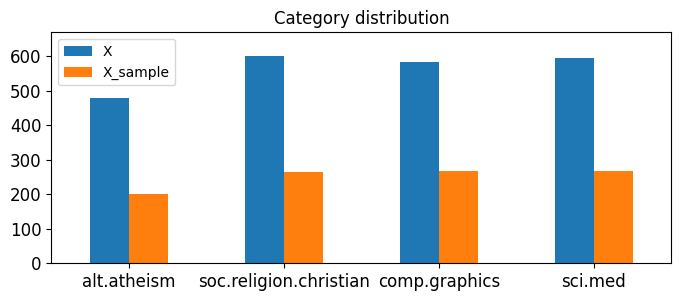

In [23]:
# Answer here
upper_bound = max(X.category_name.value_counts() + 70)
plt.style.use('fast')
# print(X.category_name.value_counts().shape)
two_bar = {'X':X.category_name.value_counts(), 'X_sample':X_sample.category_name.value_counts()}
two_bar = pd.DataFrame(two_bar, index=categories)
two_bar.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, upper_bound],
            rot = 0, fontsize = 12, figsize = (8,3))

#### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [24]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /house/walter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
exercise10 = X_counts[0:5, 0:100].toarray()
count = 0
for i, time in enumerate(exercise10[4]):
    if time == 1:
        count += 1
    if count == 2:
        target = i
        break
count_vect.get_feature_names_out()[target]

'01'

#### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


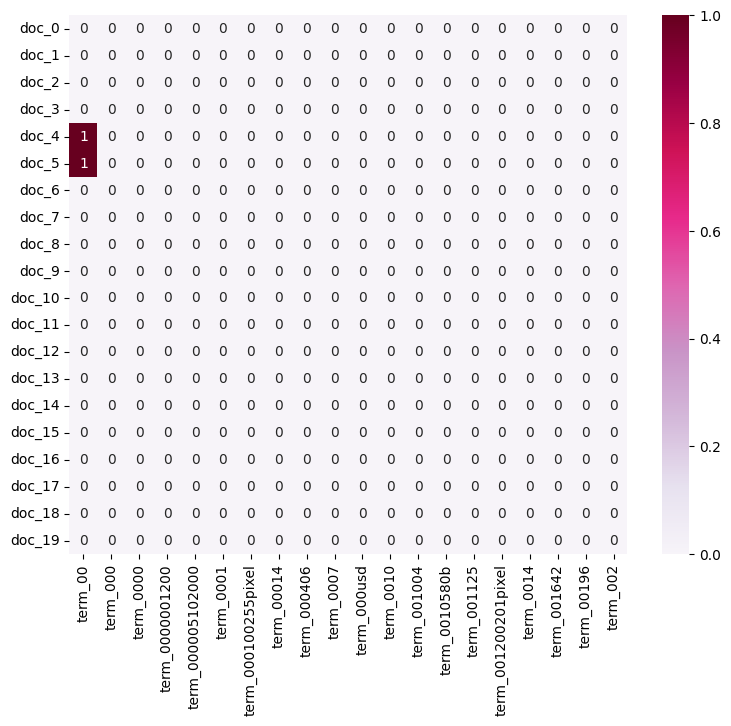

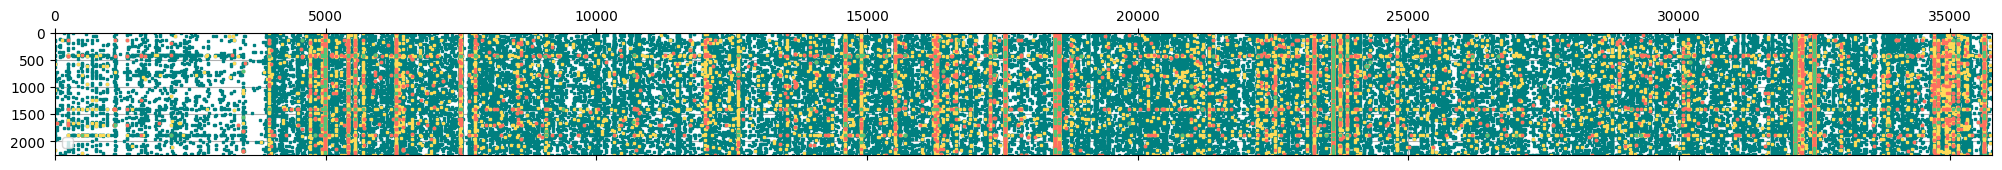

In [69]:
# Answer here
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]         # first 20 words
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]                              # first 20 documents
plot_z = X_counts[0:20, 0:20].toarray()                                           # first 20 words occur frequency in first 20 documents

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

plt.subplots(figsize=(25, 15))
# different precisions correspond to different color
precisions = [1, 5, 10, 30]
colors = ['#00dfff','#008080', '#ffdb58', '#ff6f61']

for p, c in zip(precisions, colors):
    plt.spy(X_counts, precision = p, color = c, markersize=2)
plt.grid('on')
plt.legend()

# plt.subplots(figsize=(25, 15))
# plt.spy(X_counts, precision = 5, color = 'b', markersize=2)
# plt.grid('on')

# plt.subplots(figsize=(25, 15))
# plt.spy(X_counts, precision = 10, color = 'r', markersize=2)
# plt.grid('on')

plt.show()